# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #print(city_weather["coord"])    
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
                        "City": city, 
                        "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | mari-turek
Processing Record 3 of Set 1 | pechory
Processing Record 4 of Set 1 | dunedin
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | hukumati azrah
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | st. john's
Processing Record 14 of Set 1 | papao
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | chonchi
Processing Record 17 of Set 1 | midvagur
Processing Record 18 of Set 1 | ilebo
Processing Record 19 of Set 1 | suomussalmi
Processing Record 20 of Set 1 | nadym
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | remire-montjoly
Processing Record 23 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,24.75,95,95,1.34,EC,1712029059
1,mari-turek,56.7895,49.6235,4.05,99,100,6.04,RU,1712029060
2,pechory,57.8164,27.6119,6.70,95,84,2.01,RU,1712029061
3,dunedin,-45.8742,170.5036,14.54,73,14,5.59,NZ,1712028992
4,port-aux-francais,-49.3500,70.2167,7.41,91,99,10.56,TF,1712029028
...,...,...,...,...,...,...,...,...,...
564,olyokminsk,60.3736,120.4264,-1.34,93,99,0.98,RU,1712029584
565,balkanabat,39.5108,54.3671,13.29,57,4,2.91,TM,1712029585
566,ola,59.5833,151.2833,-1.03,61,54,5.38,RU,1712029586
567,urzhar,47.0930,81.6294,8.17,50,9,1.61,KZ,1712029587


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.75,95,95,1.34,EC,1712029059
1,mari-turek,56.7895,49.6235,4.05,99,100,6.04,RU,1712029060
2,pechory,57.8164,27.6119,6.70,95,84,2.01,RU,1712029061
3,dunedin,-45.8742,170.5036,14.54,73,14,5.59,NZ,1712028992
4,port-aux-francais,-49.3500,70.2167,7.41,91,99,10.56,TF,1712029028


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

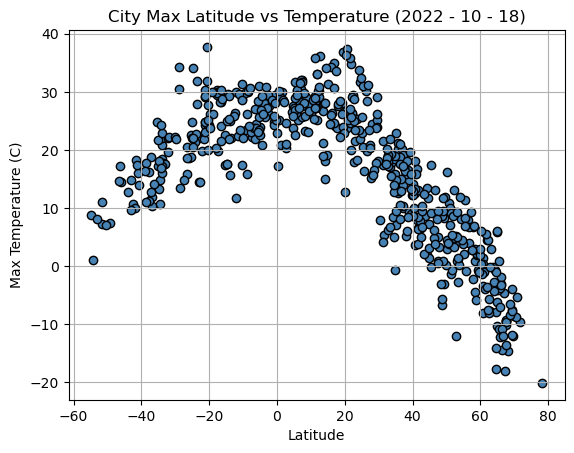

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Max Temp"], 
            marker = "o", edgecolors= "black", facecolors = "steelblue", 
           )

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022 - 10 - 18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

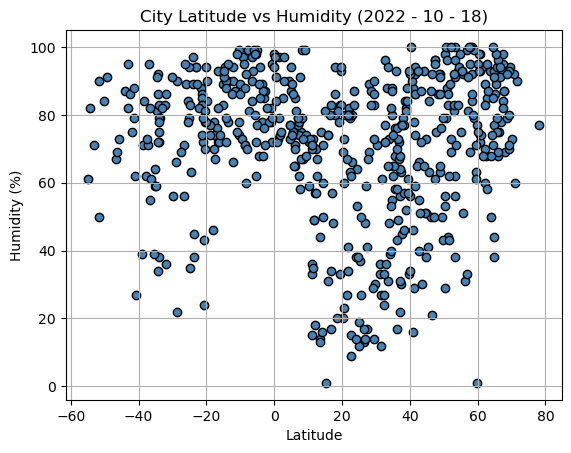

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Humidity"], 
            marker = "o", edgecolors= "black", facecolors = "steelblue")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022 - 10 - 18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

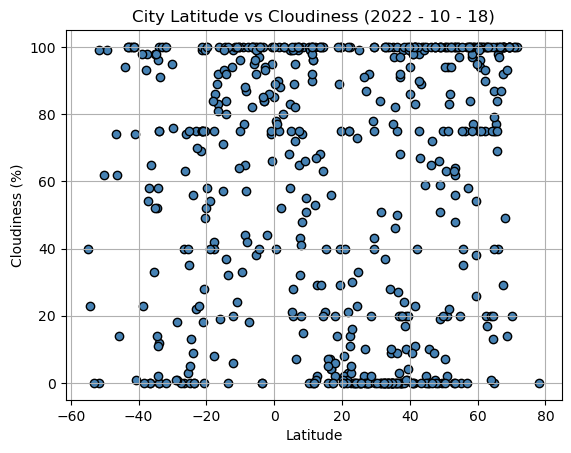

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Cloudiness"], 
            marker = "o", edgecolors= "black", facecolors = "steelblue")


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022 - 10 - 18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

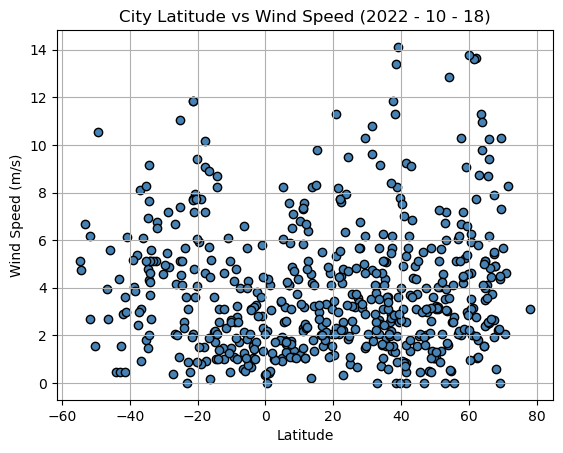

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Wind Speed"], 
            marker = "o", edgecolors= "black", facecolors = "steelblue")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2022 - 10 - 18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(n, dep_variable,indep_variable,slope)
    return()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[ city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mari-turek,56.7895,49.6235,4.05,99,100,6.04,RU,1712029060
2,pechory,57.8164,27.6119,6.70,95,84,2.01,RU,1712029061
5,bilibino,68.0546,166.4372,-14.67,69,49,0.57,RU,1712029063
6,isafjordur,66.0755,-23.1240,-3.03,68,98,10.25,IS,1712029064
8,iqaluit,63.7506,-68.5145,-0.15,93,100,11.32,CA,1712028784


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[ city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.75,95,95,1.34,EC,1712029059
3,dunedin,-45.8742,170.5036,14.54,73,14,5.59,NZ,1712028992
4,port-aux-francais,-49.3500,70.2167,7.41,91,99,10.56,TF,1712029028
7,grytviken,-54.2811,-36.5092,1.00,82,23,4.75,GS,1712029065
11,waitangi,-43.9535,-176.5597,12.68,87,94,0.45,NZ,1712029069


###  Temperature vs. Latitude Linear Regression Plot

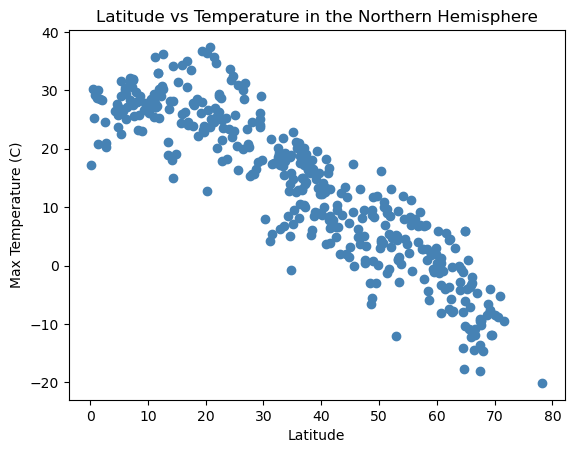

In [15]:
# Linear regression on Northern Hemisphere
plt.scatter(x = northern_hemi_df["Lat"], y = northern_hemi_df["Max Temp"], 
            marker = "o", facecolors = "steelblue", 
           )

# Incorporate the other graph properties
plt.title("Latitude vs Temperature in the Northern Hemisphere")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Show plot
plt.show()

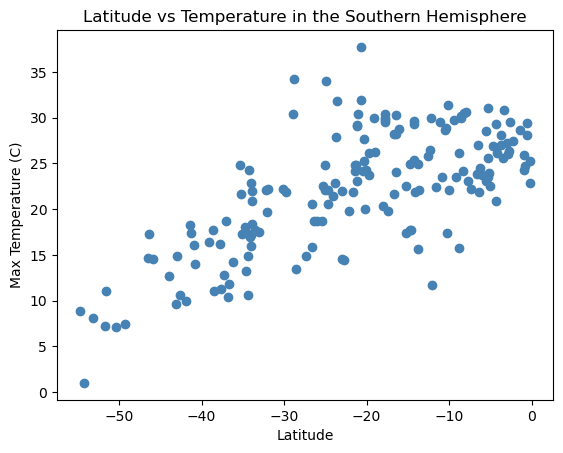

In [16]:
# Linear regression on Southern Hemisphere
plt.scatter(x = southern_hemi_df["Lat"], y = southern_hemi_df["Max Temp"], 
            marker = "o", facecolors = "steelblue", 
           )

# Incorporate the other graph properties
plt.title("Latitude vs Temperature in the Southern Hemisphere")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

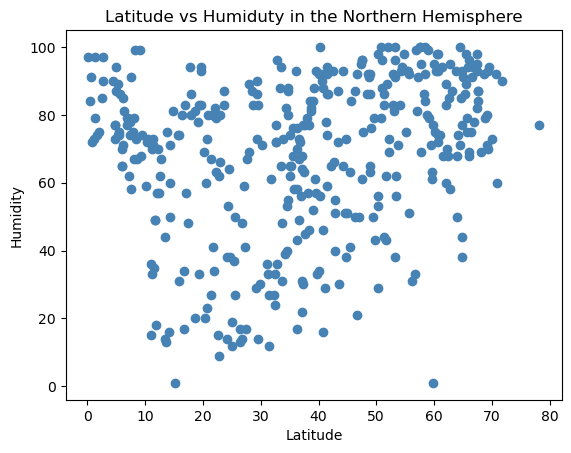

In [17]:
# Northern Hemisphere
plt.scatter(x = northern_hemi_df["Lat"], y = northern_hemi_df["Humidity"], 
            marker = "o", facecolors = "steelblue", 
           )

# Incorporate the other graph properties
plt.title("Latitude vs Humiduty in the Northern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Show plot
plt.show()

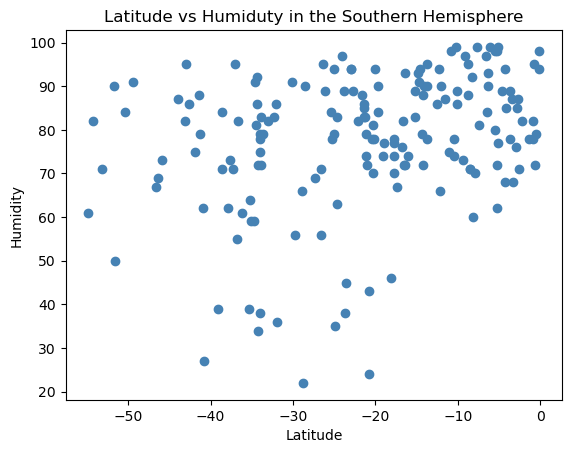

In [18]:
# Southern Hemisphere
plt.scatter(x = southern_hemi_df["Lat"], y = southern_hemi_df["Humidity"], 
            marker = "o", facecolors = "steelblue", 
           )

# Incorporate the other graph properties
plt.title("Latitude vs Humiduty in the Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

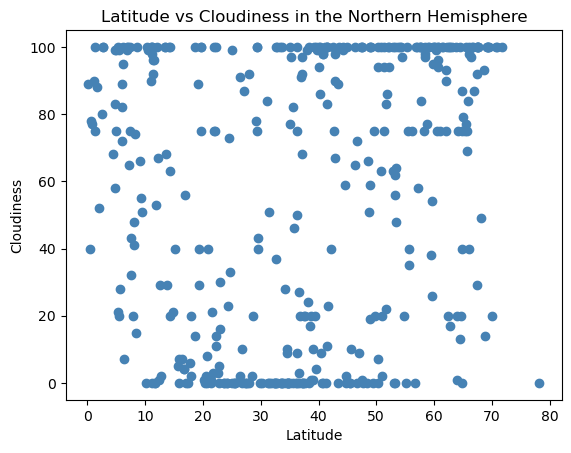

In [19]:
# Northern Hemisphere
plt.scatter(x = northern_hemi_df["Lat"], y = northern_hemi_df["Cloudiness"], 
            marker = "o", facecolors = "steelblue", 
           )

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness in the Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Show plot
plt.show()

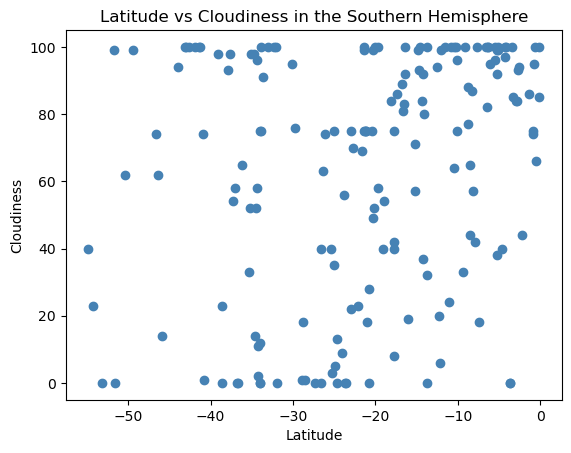

In [20]:
# Southern Hemisphere
plt.scatter(x = southern_hemi_df["Lat"], y = southern_hemi_df["Cloudiness"], 
            marker = "o", facecolors = "steelblue", 
           )

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness in the Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

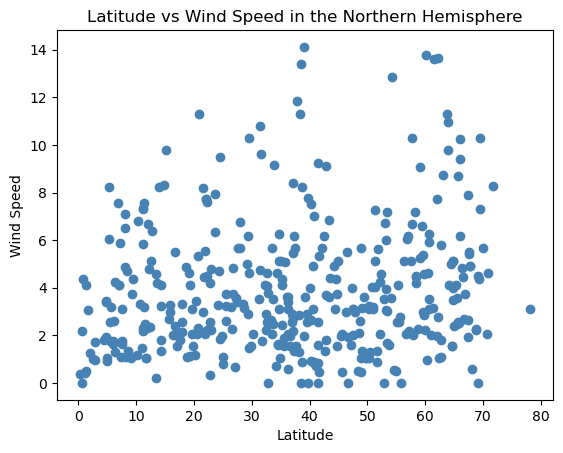

In [21]:
# Northern Hemisphere
plt.scatter(x = northern_hemi_df["Lat"], y = northern_hemi_df["Wind Speed"], 
            marker = "o", facecolors = "steelblue", 
           )

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed in the Northern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Show plot
plt.show()

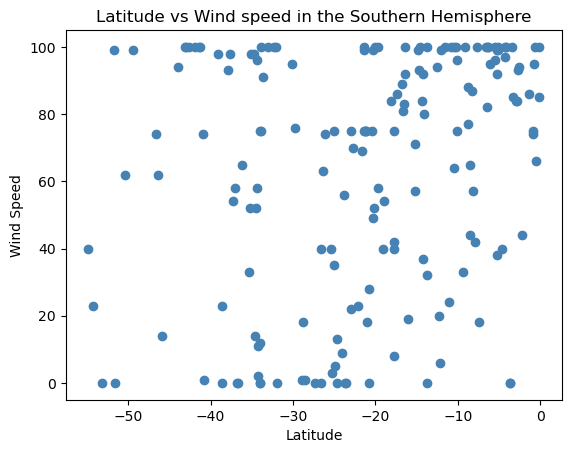

In [23]:
# Southern Hemisphere
plt.scatter(x = southern_hemi_df["Lat"], y = southern_hemi_df["Cloudiness"], 
            marker = "o", facecolors = "steelblue", 
           )

# Incorporate the other graph properties
plt.title("Latitude vs Wind speed in the Southern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE